# Clean

In [2]:
import pandas as pd

df = pd.read_csv("data/viajeros_pernoctaciones.csv")

print("Primeras filas del dataset:")
display(df.head())

print("\nInformación general:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isna().sum())

print("\nDescripción numérica:")
display(df.describe())

Primeras filas del dataset:


,periodo,provincia,viajeros_total,viajeros_esp,viajeros_ext,pernoc_total,pernoc_esp,pernoc_ext
0,2024M12,29 Málaga,292142,120096,172046,894297,247630,646667
1,2024M12,41 Sevilla,291612,154675,136937,584318,281149,303169
2,2024M12,"07 Balears, Illes",102526,39500,63026,311450,84821,226629
3,2024M12,08 Barcelona,830151,275949,554202,1900241,485475,1414766
4,2024M12,17 Girona,152175,91881,60294,252605,149407,103198



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   periodo         672 non-null    object
 1   provincia       672 non-null    object
 2   viajeros_total  672 non-null    int64 
 3   viajeros_esp    672 non-null    int64 
 4   viajeros_ext    672 non-null    int64 
 5   pernoc_total    672 non-null    int64 
 6   pernoc_esp      672 non-null    int64 
 7   pernoc_ext      672 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 42.1+ KB
None

Valores nulos por columna:
periodo           0
provincia         0
viajeros_total    0
viajeros_esp      0
viajeros_ext      0
pernoc_total      0
pernoc_esp        0
pernoc_ext        0
dtype: int64

Descripción numérica:


,viajeros_total,viajeros_esp,viajeros_ext,pernoc_total,pernoc_esp,pernoc_ext
count,6.720000e+02,672.000000,6.720000e+02,6.720000e+02,6.720000e+02,6.720000e+02
mean,5.297554e+05,202113.479167,3.276419e+05,1.631915e+06,4.254192e+05,1.206496e+06
std,4.413449e+05,145725.458026,3.606323e+05,2.031757e+06,2.861354e+05,1.883996e+06
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.163345e+05,115576.000000,8.627575e+04,4.641522e+05,2.221908e+05,2.263735e+05
50%,3.403205e+05,162598.000000,1.812045e+05,9.050155e+05,3.556850e+05,4.947815e+05
75%,8.094770e+05,251379.250000,4.552542e+05,2.129188e+06,5.814420e+05,1.372666e+06
max,2.093220e+06,627019.000000,1.851374e+06,1.141486e+07,1.409724e+06,1.041521e+07


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df["periodo"] = pd.to_datetime(df["periodo"], errors="coerce")

num_cols = ["pernoc_total", "pernoc_esp", "pernoc_ext"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("Tipos de datos tras limpieza:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isna().sum())

print("\nProvincias únicas:")
print(df["provincia"].unique()[:20])  

Tipos de datos tras limpieza:
periodo           datetime64[ns]
provincia                 object
viajeros_total             int64
viajeros_esp               int64
viajeros_ext               int64
pernoc_total               int64
pernoc_esp                 int64
pernoc_ext                 int64
dtype: object

Valores nulos por columna:
periodo           672
provincia           0
viajeros_total      0
viajeros_esp        0
viajeros_ext        0
pernoc_total        0
pernoc_esp          0
pernoc_ext          0
dtype: int64

Provincias únicas:
['29 Málaga' '41 Sevilla' '07 Balears, Illes' '08 Barcelona' '17 Girona'
 '46 Valencia/València' '28 Madrid']


C:\Users\buona\AppData\Local\Temp\ipykernel_16312\1097293293.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["periodo"] = pd.to_datetime(df["periodo"], errors="coerce")


In [4]:
periodo_raw = pd.read_csv(
    "data/viajeros_pernoctaciones.csv",
    usecols=["periodo"],
    dtype={"periodo": "string"}
)

periodo_clean = (
    periodo_raw["periodo"]
      .str.strip()
      .str.replace(r"[^0-9M]", "", regex=True)  # dejar solo dígitos y 'M'
      .str.replace("M", "-", regex=False)       # 'YYYYMmm' -> 'YYYY-mm'
      .str.cat(pd.Series(["-01"] * len(periodo_raw)), na_rep="")  # añadir día
)

periodo_dt = pd.to_datetime(periodo_clean, format="%Y-%m-%d", errors="coerce")

df["periodo"] = periodo_dt

print(df["periodo"].head(12))
print("Rango temporal:", df["periodo"].min(), "→", df["periodo"].max())

0    2024-12-01
1    2024-12-01
2    2024-12-01
3    2024-12-01
4    2024-12-01
5    2024-12-01
6    2024-12-01
7    2024-11-01
8    2024-11-01
9    2024-11-01
10   2024-11-01
11   2024-11-01
Name: periodo, dtype: datetime64[ns]
Rango temporal: 2017-01-01 00:00:00 → 2024-12-01 00:00:00


# Evolucion

In [5]:
evolucion_nacional = df.groupby("periodo")["pernoc_total"].sum().reset_index()

evolucion_provincia = df.groupby(["periodo", "provincia"])["pernoc_total"].sum().reset_index()

print("Evolución nacional (primeras filas):")
print(evolucion_nacional.head())

print("\nEvolución por provincia (primeras filas):")
print(evolucion_provincia.head())

Evolución nacional (primeras filas):
     periodo  pernoc_total
0 2017-01-01       5147607
1 2017-02-01       5945256
2 2017-03-01       8199455
3 2017-04-01      12146239
4 2017-05-01      16967220

Evolución por provincia (primeras filas):
     periodo          provincia  pernoc_total
0 2017-01-01  07 Balears, Illes        224756
1 2017-01-01       08 Barcelona       1615020
2 2017-01-01          17 Girona        181407
3 2017-01-01          28 Madrid       1691367
4 2017-01-01          29 Málaga        737402


In [6]:
inicio = evolucion_nacional["pernoc_total"].iloc[0]
fin = evolucion_nacional["pernoc_total"].iloc[-1]
crecimiento = ((fin - inicio) / inicio) * 100
print(f"Evolución total de pernoctaciones 2017–2024: {crecimiento:.2f}%")

top_provincias_2024 = (
    df[df["periodo"].dt.year == 2024]
    .groupby("provincia")["pernoc_total"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("\nTop 5 provincias con más pernoctaciones en 2024:")
print(top_provincias_2024)

df["mes"] = df["periodo"].dt.month
media_mensual = (
    df.groupby("mes")["pernoc_total"].mean().reset_index()
)

print("\nPromedio mensual de pernoctaciones (2017–2024):")
print(media_mensual)

Evolución total de pernoctaciones 2017–2024: 27.38%

Top 5 provincias con más pernoctaciones en 2024:
provincia
07 Balears, Illes    63040602
08 Barcelona         34629950
28 Madrid            26780945
29 Málaga            22049260
17 Girona            12759295
Name: pernoc_total, dtype: int64

Promedio mensual de pernoctaciones (2017–2024):
    mes  pernoc_total
0     1  6.802569e+05
1     2  7.966812e+05
2     3  9.970388e+05
3     4  1.335733e+06
4     5  1.919872e+06
5     6  2.267248e+06
6     7  2.741320e+06
7     8  2.912165e+06
8     9  2.388841e+06
9    10  1.924044e+06
10   11  8.565974e+05
11   12  7.631871e+05


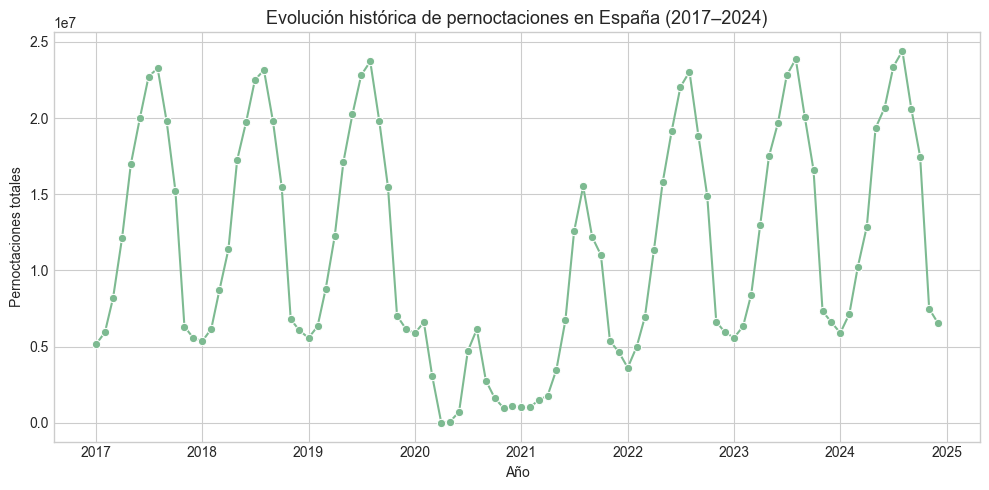

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("crest")

# Evolución nacional
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=evolucion_nacional,
    x="periodo",
    y="pernoc_total",
    marker="o"
)
plt.title("Evolución histórica de pernoctaciones en España (2017–2024)", fontsize=13)
plt.xlabel("Año")
plt.ylabel("Pernoctaciones totales")
plt.tight_layout()
plt.show()

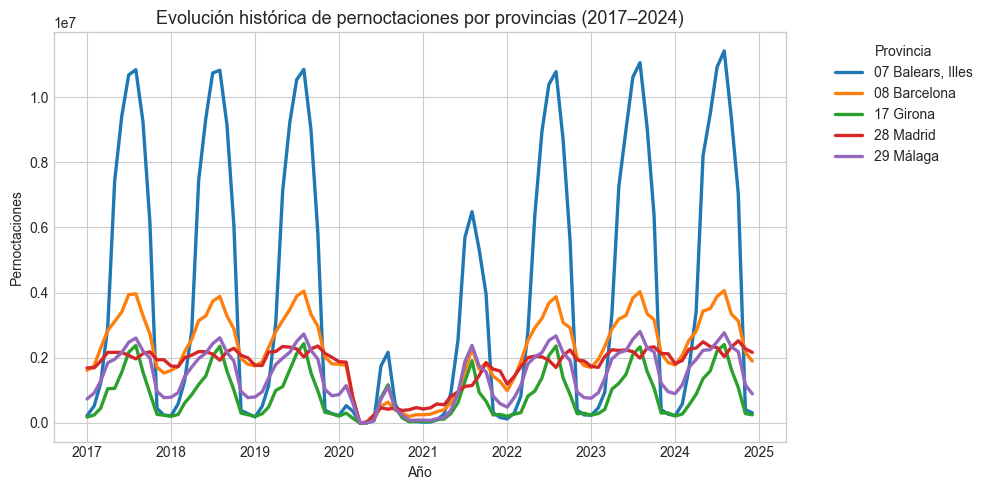

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

top5 = ["07 Balears, Illes", "08 Barcelona", "28 Madrid", "29 Málaga", "17 Girona"]

palette = sns.color_palette("tab10", n_colors=5)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=evolucion_provincia[evolucion_provincia["provincia"].isin(top5)],
    x="periodo",
    y="pernoc_total",
    hue="provincia",
    palette=palette,
    linewidth=2.4,
    dashes=False
)
plt.title("Evolución histórica de pernoctaciones por provincias (2017–2024)", fontsize=13)
plt.xlabel("Año")
plt.ylabel("Pernoctaciones")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

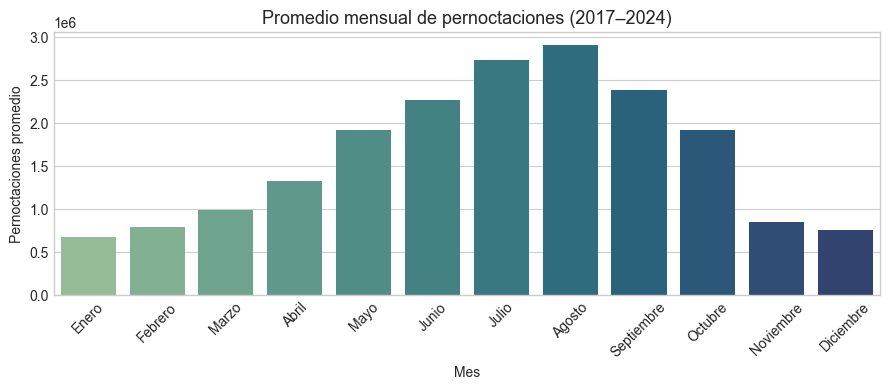

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mes_map = {
    1:"Enero", 2:"Febrero", 3:"Marzo", 4:"Abril", 5:"Mayo", 6:"Junio",
    7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"
}
orden_meses = list(mes_map.values())

media_mensual["mes_nombre"] = media_mensual["mes"].map(mes_map)
media_mensual["mes_nombre"] = pd.Categorical(media_mensual["mes_nombre"],
                                             categories=orden_meses, ordered=True)

plt.figure(figsize=(9, 4))
sns.barplot(
    data=media_mensual,
    x="mes_nombre",
    y="pernoc_total",
    hue="mes_nombre",
    legend=False,
    palette="crest"
)
plt.title("Promedio mensual de pernoctaciones (2017–2024)", fontsize=13)
plt.xlabel("Mes")
plt.ylabel("Pernoctaciones promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()